In [12]:
from pathlib import Path

import geopandas as gpd
import pyrosm
import matplotlib.pyplot as plt

from load_data import DataLoader

In [6]:
this_file_parent = globals()['_dh'][0]
data_location = Path(this_file_parent).parent / "data"
data_location.mkdir(exist_ok=True)

data_files = {
    "admin_0_countries_zip_filepath" : data_location / "ne_110m_admin_0_countries.zip",
    "admin_0_countries_unzipped_filepath": data_location / "ne_110m_admin_0_countries",
    "admin_0_countries_shp_filepath": data_location / "ne_110m_admin_0_countries" / "ne_110m_admin_0_countries.shp",
    "osm_pbf": None,
    "osm_sqlite": data_location / "osm.sqlite",
    "osm_feather": data_location / "osm.feather",
}

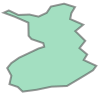

In [5]:
admin_0_countries_filepath = data_location / "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
world = gpd.read_file(admin_0_countries_filepath)

finland = world[world['ADMIN'] == 'Finland']
finland_polygon = finland['geometry'].iloc[0]
finland_polygon

In [18]:
loader = DataLoader(debug=True)
bad_landing_backup = loader.bad_landing_gs

finland_osm_gs.info():
<class 'geopandas.geoseries.GeoSeries'>
Index: 100295 entries, 49 to 3775866
Series name: geometry
Non-Null Count   Dtype   
--------------   -----   
100295 non-null  geometry
dtypes: geometry(1)
memory usage: 1.5 MB
None
Loaded OSM data


In [19]:
bad_landing = bad_landing_backup.to_crs("3857")

In [ ]:
helsinki_bbox = (24.782, 60.000, 25.300, 60.300)
fig, ax = plt.subplots(figsize=(10, 10))

bad_landing_backup.plot(ax=ax, color='red')

ax.set_xlim(helsinki_bbox[0], helsinki_bbox[2])
ax.set_ylim(helsinki_bbox[1], helsinki_bbox[3])

<Axes: ylabel='Frequency'>

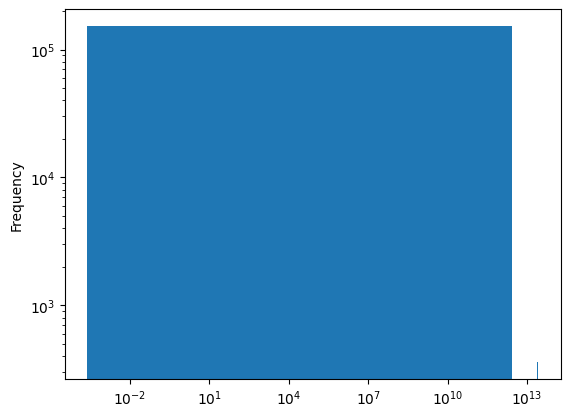

In [27]:
# Print the largest polygons and their areas
bad_landing_areas = bad_landing.area
bad_landing_areas.sort_values(ascending=False).plot(kind='hist', logx=True, logy=True)

In [7]:
finland.describe()

,scalerank,LABELRANK,ADM0_DIF,LEVEL,GEOU_DIF,SU_DIF,BRK_DIFF,BRK_GROUP,MAPCOLOR7,MAPCOLOR8,...,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000e+00
mean,1.0,3.0,1.0,2.0,0.0,0.0,0.0,NaN,4.0,1.0,...,7.0,4.0,-99.0,1.0,0.0,3.0,8.0,27.276449,63.252361,1.159321e+09
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,3.0,1.0,2.0,0.0,0.0,0.0,NaN,4.0,1.0,...,7.0,4.0,-99.0,1.0,0.0,3.0,8.0,27.276449,63.252361,1.159321e+09
25%,1.0,3.0,1.0,2.0,0.0,0.0,0.0,NaN,4.0,1.0,...,7.0,4.0,-99.0,1.0,0.0,3.0,8.0,27.276449,63.252361,1.159321e+09
50%,1.0,3.0,1.0,2.0,0.0,0.0,0.0,NaN,4.0,1.0,...,7.0,4.0,-99.0,1.0,0.0,3.0,8.0,27.276449,63.252361,1.159321e+09
75%,1.0,3.0,1.0,2.0,0.0,0.0,0.0,NaN,4.0,1.0,...,7.0,4.0,-99.0,1.0,0.0,3.0,8.0,27.276449,63.252361,1.159321e+09
max,1.0,3.0,1.0,2.0,0.0,0.0,0.0,NaN,4.0,1.0,...,7.0,4.0,-99.0,1.0,0.0,3.0,8.0,27.276449,63.252361,1.159321e+09


<Axes: >

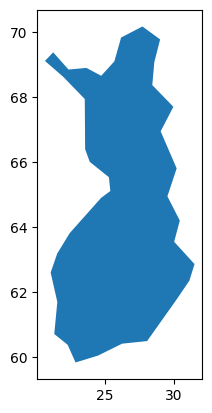

In [6]:
finland.plot()

In [7]:
import subprocess

osm_sqlite_filepath = data_files['osm_sqlite']
if not osm_sqlite_filepath.exists():
    osm_pbf_filepath = pyrosm.get_data("Finland", directory=data_location, update=True)
    command = f"ogr2ogr -f SQLite -lco FORMAT=WKT {osm_sqlite_filepath} {osm_pbf_filepath}"
    subprocess.run(command.split())
    #geometries_of_interest = sqlite_to_geodataframe(osm_sqlite_filepath)

Downloaded Protobuf data 'finland-latest.osm.pbf' (557.01 MB) to:
'/home/jpartanen/Documents/masters_thesis/repos/find_launch_time/data/finland-latest.osm.pbf'
0...10...20...30...40...50...60...70...80...90...100 - done.


CompletedProcess(args=['ogr2ogr', '-f', 'SQLite', '-lco', 'FORMAT=WKT', '/home/jpartanen/Documents/masters_thesis/repos/find_launch_time/data/osm.sqlite', '/home/jpartanen/Documents/masters_thesis/repos/find_launch_time/data/finland-latest.osm.pbf'], returncode=0)

In [8]:
import sqlite3

con = sqlite3.connect(osm_sqlite_filepath)
cursor = con.cursor()

# inspect the result
query = """
SELECT 
    name
FROM 
    sqlite_master
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%';
    """

tables = cursor.execute(query)
tables.fetchall()

[('geometry_columns',),
 ('spatial_ref_sys',),
 ('points',),
 ('lines',),
 ('multilinestrings',),
 ('multipolygons',),
 ('other_relations',)]

In [9]:
query = """
SELECT 
    COUNT(*)
FROM 
    multipolygons
"""

count = cursor.execute(query)
count.fetchall()

[(3775972,)]